# Stack Overflow Annual Developer Survey 2020
## Analyse Minorities Answers 


This is a project 1 from Udacity Data Scients Nanodegree, the gol is to find out about this questions:


* How minorities breaks IT fields 
* Company values, size and Job satisfaction 
* On-boarding Process, Job Hunt Factors

Data Source: [https://insights.stackoverflow.com/survey/]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# Import data frames 
df = pd.read_csv('./developer_survey_2020/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
schema = pd.read_csv('./developer_survey_2020/survey_results_schema.csv')
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [4]:
# Search by columns name  
schema[schema["Column"].str.contains("Ethni")]

,Column,QuestionText
16,Ethnicity,"Which of the following describe you, if any? P..."


In [5]:
# Quantity groups by Country, Ethinicity  and Gender 
df[['Country', 'Ethnicity', 'Gender']].value_counts().head(50)

Country             Ethnicity                                            Gender
United States       White or of European descent                         Man       6795
Germany             White or of European descent                         Man       2597
India               South Asian                                          Man       2465
United Kingdom      White or of European descent                         Man       2460
France              White or of European descent                         Man       1097
Canada              White or of European descent                         Man       1096
Poland              White or of European descent                         Man        948
Netherlands         White or of European descent                         Man        838
Italy               White or of European descent                         Man        808
United States       White or of European descent                         Woman      723
Russian Federation  White or of European

#### Check percent nulls  

In [6]:
np.sum(df['Country'].isnull())/df.shape[0]

0.006034656614076729

In [7]:
np.sum(df['Ethnicity'].isnull())/df.shape[0]

0.2871969097593894

In [8]:
np.sum(df['Gender'].isnull())/df.shape[0]

0.21569631249903043

In [9]:
# Remove nulls in the mains colununs 
df_dropnan = df.dropna(subset=['Ethnicity','Gender'])

In [10]:
# Quantity after excluded null values 
df_dropnan[['Ethnicity','Gender']].value_counts()

Ethnicity                                                                                                                                                                     Gender                                           
White or of European descent                                                                                                                                                  Man                                                  26596
South Asian                                                                                                                                                                   Man                                                   4126
White or of European descent                                                                                                                                                  Woman                                                 2104
Hispanic or Latino/a/x                                                       

## % of White  Man respondents 

In [11]:
df_dropnan[(df_dropnan['Ethnicity'].str.contains("White")  &  df_dropnan['Gender'].str.contains("Man"))].shape[0]/df_dropnan.shape[0]

0.627027264925291

## White Man is 62,7 % of all respondents

In [12]:
# Not White Man respondents 
df_minority = df_dropnan[~(df_dropnan['Ethnicity'].str.contains("White")  &  df_dropnan['Gender'].str.contains("Man"))]

In [13]:
df_minority.groupby(['Ethnicity', 'Gender']).Respondent.count().sort_values(ascending=False).head(30)

Ethnicity                                                                         Gender                                                 
South Asian                                                                       Man                                                        4126
White or of European descent                                                      Woman                                                      2104
Hispanic or Latino/a/x                                                            Man                                                        2061
Southeast Asian                                                                   Man                                                        1496
Black or of African descent                                                       Man                                                        1480
Middle Eastern                                                                    Man                                               

Now we can see a diferente mojority like South Asian people in India, them we will remove the major male ethnicity in each country. Becouse  we want to listening every woman then we will not exclue they in our study idempendent her ethinicity. 

In [14]:
# Top Ethnicity in each country 
df_country_top_ethnicity = df_dropnan.groupby(['Country', 'Ethnicity'], as_index = False)['Respondent'].count()
df_country_top_ethnicity = df_country_top_ethnicity.sort_values(['Respondent'], ascending = False).groupby(['Country'], as_index=False).head(1)
df_country_top_ethnicity.head(20)

,Country,Ethnicity,Respondent
1353,United States,White or of European descent,7684
465,Germany,White or of European descent,2781
1241,United Kingdom,White or of European descent,2767
541,India,South Asian,2610
247,Canada,White or of European descent,1216
420,France,White or of European descent,1192
931,Poland,White or of European descent,994
815,Netherlands,White or of European descent,905
624,Italy,White or of European descent,837
977,Russian Federation,White or of European descent,751


In [15]:
# Gender distribution 
df_dropnan['Gender'].value_counts()#/df_dropnan.shape[0]

Man                                                            41441
Woman                                                           3398
Non-binary, genderqueer, or gender non-conforming                340
Man;Non-binary, genderqueer, or gender non-conforming            111
Woman;Non-binary, genderqueer, or gender non-conforming           86
Woman;Man                                                         48
Woman;Man;Non-binary, genderqueer, or gender non-conforming       19
Name: Gender, dtype: int64

In [16]:
# Exclude Gender categories with names start "man"
df_dropnan[df_dropnan['Gender'].str.fullmatch("^man" , flags = 2)]

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64430,61111,NaN,Yes,38.0,35,NaN,NaN,NaN,Israel,NaN,...,Easy,Appropriate in length,No,NaN,React.js,ASP.NET Core;Django;React.js,Somewhat more welcome now than last year,NaN,3,NaN
64432,61490,NaN,Yes,NaN,14,NaN,NaN,NaN,United Kingdom,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Angular.js;Ruby on Rails,Flask;jQuery;Vue.js,Just as welcome now as I felt last year,NaN,13,NaN
64433,61561,NaN,Yes,64.0,18,NaN,NaN,NaN,France,NaN,...,Neither easy nor difficult,Appropriate in length,No,"Information systems, information technology, o...",Angular.js;jQuery;React.js;Vue.js,jQuery,A lot more welcome now than last year,NaN,30,NaN
64437,61983,NaN,Yes,NaN,25,NaN,NaN,NaN,Pakistan,NaN,...,Neither easy nor difficult,Appropriate in length,No,NaN,Django;Flask,NaN,NaN,NaN,Less than 1 year,3


In [17]:
# DataFrame withought top ethnicity mans in each country

#Merge df_dropnan and df_country_top_ethnicity
majority = pd.merge(df_dropnan, df_country_top_ethnicity, how = "left", on = ['Country', 'Ethnicity'])

# Gender start with man  and has in top ethnicity in country 
majority = majority[ majority['Gender'].str.fullmatch("^man" , flags = 2) & (~ pd.isna(majority['Respondent_y'])) ]

In [18]:
majority[['Country', 'Ethnicity', 'Gender']].value_counts().head(50)

Country             Ethnicity                     Gender
United States       White or of European descent  Man       6795
Germany             White or of European descent  Man       2597
India               South Asian                   Man       2465
United Kingdom      White or of European descent  Man       2460
France              White or of European descent  Man       1097
Canada              White or of European descent  Man       1096
Poland              White or of European descent  Man        948
Netherlands         White or of European descent  Man        838
Italy               White or of European descent  Man        808
Russian Federation  White or of European descent  Man        690
Australia           White or of European descent  Man        646
Sweden              White or of European descent  Man        608
Spain               White or of European descent  Man        559
Brazil              White or of European descent  Man        512
Switzerland         White or of E

In [19]:
# Minority is not in majority dataframe
diversity = df_dropnan[~df_dropnan['Respondent'].isin(majority['Respondent_x'])]
diversity = diversity [['Respondent', 'Country', 'Ethnicity', 'Gender']]
diversity.head(50)

,Respondent,Country,Ethnicity,Gender
19,20,Spain,Hispanic or Latino/a/x,Man
24,25,Portugal,Hispanic or Latino/a/x,Man
25,26,Canada,East Asian,Man
27,28,China,Black or of African descent,Man
30,31,Russian Federation,East Asian,Man
34,35,United States,White or of European descent,Woman
36,37,France,Middle Eastern,Man
39,40,United States,Hispanic or Latino/a/x,Woman
52,53,United States,East Asian,Man
53,54,United States,White or of European descent;Indigenous (such ...,Man


Now we can see diversity people in the diversity dataframe. 
To recap, now we will see the answers from the not man and dominant ethnicity in country in other words we selected every Womans and not binary gender and mans not dominant ethnicity

### Transform Gender groups, for more easy analysis we will group in 3 categories 

* Man 
* Woman 
* Non-binary

In [20]:
# Gender distribution in diversity dataframe 
diversity["Gender"].value_counts()/diversity.shape[0]

Man                                                            0.671267
Woman                                                          0.279119
Non-binary, genderqueer, or gender non-conforming              0.027928
Man;Non-binary, genderqueer, or gender non-conforming          0.009118
Woman;Non-binary, genderqueer, or gender non-conforming        0.007064
Woman;Man                                                      0.003943
Woman;Man;Non-binary, genderqueer, or gender non-conforming    0.001561
Name: Gender, dtype: float64

In [21]:
# set Non-binary to not straight gender
diversity.loc[~((diversity.Gender == "Man") | (diversity.Gender == "Woman")), "Gender"] = "Non-binary"

<AxesSubplot:xlabel='count', ylabel='Gender'>

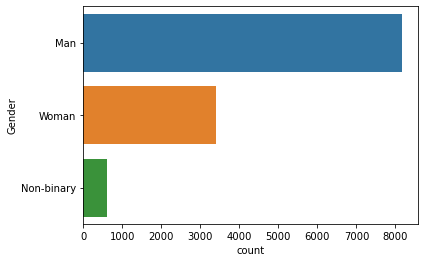

In [22]:
sns.countplot( y="Gender", data=diversity)

Mans continue in larger number even in diversity group, maybe we will use weights to make better distribution. 

### Ethnicity  Transformatios 
* is a multiple choice Question and we can choose all combination.  



In [23]:
# replace 
#Indigenous (such as Native American, Pacific Islander, or Indigenous Australian) 
diversity.loc[ diversity.Ethnicity == "Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)", "Ethnicity"] = "Indigenous" 

In [24]:
# When respondente has a multiple choise set Other 
diversity.loc[diversity.Ethnicity.str.contains(';'), "Ethnicity"]  =  "Other"

In [25]:
diversity[["Gender","Ethnicity"]].value_counts()

Gender      Ethnicity                   
Man         Other                           2358
Woman       White or of European descent    2104
Man         Hispanic or Latino/a/x          1012
            East Asian                       944
            Middle Eastern                   867
            South Asian                      866
            Southeast Asian                  792
            Black or of African descent      500
            White or of European descent     411
Non-binary  White or of European descent     393
Man         Multiracial                      253
Woman       South Asian                      242
            Other                            222
            East Asian                       177
            Black or of African descent      174
            Hispanic or Latino/a/x           162
            Southeast Asian                  142
            Middle Eastern                   129
Man         Biracial                         122
Non-binary  Other           

<AxesSubplot:xlabel='count', ylabel='Ethnicity'>

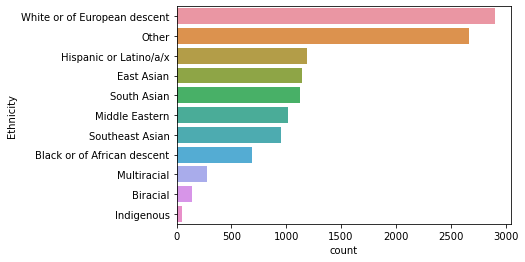

In [26]:
sns.countplot( y="Ethnicity"
              , data=diversity
              ,order = diversity['Ethnicity'].value_counts().index
             )

<AxesSubplot:ylabel='Ethnicity'>

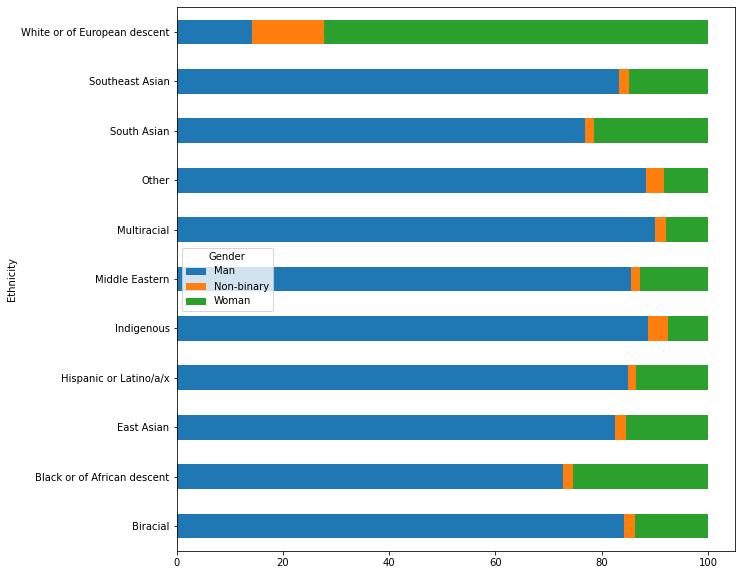

In [27]:
# Stacked Bar for percentege of Gender in Ethnicity 
# Percent frequency table of the factors 
ax = pd.crosstab(diversity["Ethnicity"], diversity["Gender"]).apply(lambda r: r/r.sum()*100, axis=1)

ax.plot.barh(stacked=True, figsize=(10,10))

<AxesSubplot:ylabel='Gender'>

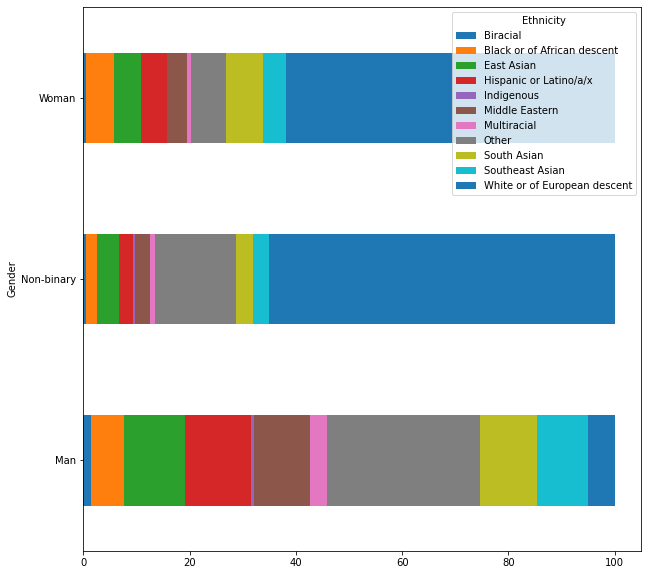

In [28]:
ax = pd.crosstab(diversity["Gender"], diversity["Ethnicity"]).apply(lambda r: r/r.sum()*100, axis=1)

ax.plot.barh(stacked=True, figsize=(10,10))

### Select Columns  to investigate 

* JobFactors

Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?  

* NEWJobHuntResearch

 When job searching, how do you learn more about a company? Select all that apply.  
 
 
* JobSat
 
   How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.) 

In [29]:
#Find questions to diversity people metters to select companys to work. 
with pd.option_context("max_colwidth", None):
    print(schema[ schema['QuestionText'].str.contains("Job", case=False)])

                Column  \
18          JobFactors   
19              JobSat   
20             JobSeek   
30          NEWJobHunt   
31  NEWJobHuntResearch   
36         NEWOvertime   

                                                                                                                                                             QuestionText  
18  Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?  
19                                              How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)  
20                                                                                                 Which of the following best describes your current job-seeking status?  
30                                                                                              In general, what drives you to lo

In [30]:
with pd.option_context("max_rows", None):
    print(schema)

                          Column  \
0                     Respondent   
1                     MainBranch   
2                       Hobbyist   
3                            Age   
4                     Age1stCode   
5                       CompFreq   
6                      CompTotal   
7                  ConvertedComp   
8                        Country   
9                   CurrencyDesc   
10                CurrencySymbol   
11        DatabaseDesireNextYear   
12            DatabaseWorkedWith   
13                       DevType   
14                       EdLevel   
15                    Employment   
16                     Ethnicity   
17                        Gender   
18                    JobFactors   
19                        JobSat   
20                       JobSeek   
21        LanguageDesireNextYear   
22            LanguageWorkedWith   
23        MiscTechDesireNextYear   
24            MiscTechWorkedWith   
25  NEWCollabToolsDesireNextYear   
26      NEWCollabToolsWorked

### Function Count Multiple Choice options frequency


In [31]:
np.sum(df['JobFactors'].isnull())/df.shape[0]

0.23443632584043064

In [45]:
# Function return unique options array 
def questions_options(df_columns , sep = ";"):
    '''
    INPUT
    df_column - Colum to extract values sep 
    
    OUTPUT:
    options - Array with unique options values for coluns 
    '''
    options = []   
    for row in df_columns.value_counts().index: # find each option value        
        split = row.split(sep) # Split answer by ; and set 
        for item in split:
            if not item in options:           
                options.append(item) # add unique  values
    return options
            

In [56]:

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [32]:
# mont data set for count 

# Count frequency of option value in each agragation parameter

In [53]:
cols = questions_options(df["JobFactors"])

In [ ]:
total_count(df , "JobFactors" , "Respond")

In [55]:
pd.get_dummies(df["JobFactors"], columns= cols)

,Diversity of the company or organization,Diversity of the company or organization;Family friendliness,Diversity of the company or organization;Financial performance or funding status of the company or organization,Diversity of the company or organization;Financial performance or funding status of the company or organization;Family friendliness,Diversity of the company or organization;Financial performance or funding status of the company or organization;How widely used or impactful my work output would be,Diversity of the company or organization;Financial performance or funding status of the company or organization;Office environment or company culture,Diversity of the company or organization;Financial performance or funding status of the company or organization;Opportunities for professional development,Diversity of the company or organization;Flex time or a flexible schedule,Diversity of the company or organization;Flex time or a flexible schedule;Family friendliness,Diversity of the company or organization;Flex time or a flexible schedule;Financial performance or funding status of the company or organization,...,Specific department or team I’d be working on;Office environment or company culture;Family friendliness,Specific department or team I’d be working on;Office environment or company culture;Opportunities for professional development,Specific department or team I’d be working on;Opportunities for professional development,Specific department or team I’d be working on;Opportunities for professional development;Family friendliness,Specific department or team I’d be working on;Remote work options,Specific department or team I’d be working on;Remote work options;Family friendliness,Specific department or team I’d be working on;Remote work options;Financial performance or funding status of the company or organization,Specific department or team I’d be working on;Remote work options;How widely used or impactful my work output would be,Specific department or team I’d be working on;Remote work options;Office environment or company culture,Specific department or team I’d be working on;Remote work options;Opportunities for professional development
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Frame of groups to analysis 

Majority vs Minority ( Gender and Ethinicity)